<h2><font color="#004D7F" size=6>Módulo 5. Fase de modelado</font></h2>



<h1><font color="#004D7F" size=5>2. Plantilla para comparar algoritmos</font></h1>

<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Manuel Castillo-Cara</font><br>
<font color="#004D7F" size=3>Machine Learning con Python</font><br>

---

<h2><font color="#004D7F" size=5>Índice</font></h2>
<a id="indice"></a>

* [1. Introducción](#section1)
    * [1.1. Librerías](#section11)
    * [1.2. CSV](#section12)
* [2. Plantilla para comparar algoritmos](#section2)
* [3. Estudio de linea base](#section3)
    * [3.1. Instalación de librerías](#section31)
    * [3.2. Problema de clasificación](#section32)
    * [3.3. Problema de regresión](#section33)

In [1]:
# Permite ajustar la anchura de la parte útil de la libreta (reduce los márgenes)
from IPython.core.display import display, HTML
display(HTML("<style>.container{ width:98% }</style>"))

C:\Users\Maxi Mores\AppData\Local\Temp\ipykernel_3592\1126351303.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


---

<a id="section1"></a>
# <font color="#004D7F"> 1. Introducción</font>

Cuando trabajas en un proyecto de ML, a menudo terminas con múltiples buenos modelos para elegir. Cada modelo tendrá diferentes características de rendimiento. Usando métodos de remuestreo como la validación cruzada, puede obtener una estimación de la precisión de cada modelo en datos no etiquetados. Debe poder utilizar estas estimaciones para elegir uno o dos mejores modelos del conjunto de modelos que ha creado.

Cuando tiene un nuevo conjunto de datos, es una buena idea visualizar los datos utilizando diferentes técnicas para ver los datos desde diferentes perspectivas. La misma idea se aplica a la selección del modelo. Debe usar una cantidad de formas diferentes de ver la precisión estimada de sus algoritmos de ML para elegir uno o dos algoritmos para finalizar. Una forma de hacerlo es utilizar métodos de visualización para mostrar la precisión promedio, la varianza y otras propiedades de la distribución de las precisiones del modelo.

<a id="section11"></a>
## <font color="#004D7F"> 1.1. Librerías</font>

Vamos a declarar algunas librerías generales que ya hemos estado trabajando y que usaremos a lo largo de la sección.

In [2]:
#Importo libraries para clasificación
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
#Importo libraries para regresión
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

<a id="section12"></a>
## <font color="#004D7F"> 1.2. CSV</font>

En esta lección, se muestran varias métricas de evaluación de algoritmos diferentes para problemas de Machine Learning de clasificación y regresión. En cada código, el conjunto de datos se descarga directamente del repositorio de UCI Machine Learning.
* **Clasificación**: Se utilizará el conjunto de datos de Pima Indians Diabetes con una validación cruzada 10-folds para demostrar cómo verificar cada algoritmo de ML y se utilizan medidas de precisión promedio para indicar el rendimiento del algoritmo.

In [3]:
# Clasification problem
filename = 'data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8] # características
Y = array[:,8] # target

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section31"></a>
# <font color="#004D7F"> 2. Plantilla para comparar algoritmos</font>

La clave para una comparación equitativa de los algoritmos de ML es garantizar que cada algoritmo se evalúe de la misma manera en los mismos datos. Los algoritmos se comparan en un único conjunto de datos:
* Logistic Regression.
* Linear Discriminant Analysis.
* k-Nearest Neighbors.
* Classification and Regression Trees. 
* Naive Bayes.
* Support Vector Machines.

El código mostrará:
* Una lista de cada nombre corto de algoritmo, el accuracy media y el accuracy de la desviación estándar.
* Un diagrama Boxplot que muestra la extensión de los puntajes de accuracy en cada fold de validación cruzada para cada algoritmo.

In [10]:
# Comparo Algoritmos (Clasificación)
# Preparo modelos (para clasificación)
models = []
models.append(('LoR',LogisticRegression(solver='lbfgs',max_iter=1000)))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('k-NN',KNeighborsClassifier(n_neighbors=19)))
models.append(('CART',DecisionTreeClassifier())) # podemos agg todos los modelos que querramos (probar opciones con hiperparámetros)
models.append(('NB',GaussianNB()))
models.append(('SVC',SVC(gamma='auto',C=2.0,kernel='linear')))

# Evalúo cada modelo por turno (puedo utilizar div por porcentajes en train/test en vez de kfold)
results = []
names = []
scoring = 'accuracy' # problema de clasificación (podemos cambiar a Kappa o similares para clasificación o MSE y demás para regresión)
for name,model in models: # desempaqueta las tuplas de models en name,model
    kfold = KFold(n_splits=10,random_state=7,shuffle=True) # objeto de entrenamiento
    cv_results = cross_val_score(model,X,Y,cv=kfold,scoring=scoring) # resultados con validación cruzada
    results.append(cv_results) # almacenamos en results los resultados
    names.append(name) # almacenamos en names los nombres
    print(f"{name}: {cv_results.mean()*100.0:,.2f}% ({cv_results.std()*100.0:,.2f}%)") # cambiar el print si es regresión (solo results.mean())

# Ante resultados similares, conviene elegir los modelos con menor varianza o mayor capacidad de majora con la configuración de hiperparámetros
# Podriamos seleccionar los modelos de LoR,LDA y NB para seguir probando (pero k-NN, SVC y CART tiene mucha capacidad de mejora con hiperparámetros también)

LoR: 77.22% (4.97%)
LDA: 76.70% (4.80%)
k-NN: 76.17% (4.56%)
CART: 68.63% (5.17%)
NB: 75.91% (3.90%)
SVC: 76.95% (3.69%)


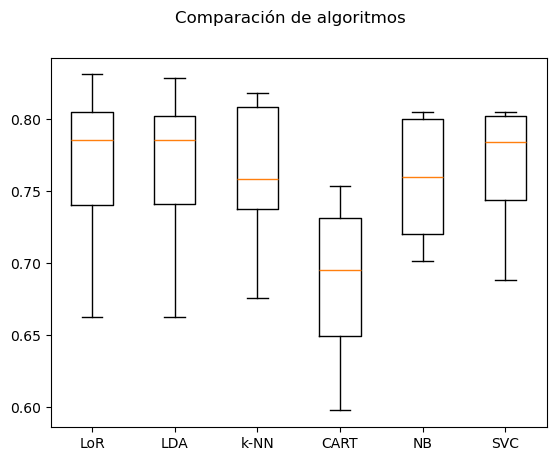

In [12]:
# Boxplot para comparar modelos
fig = plt.figure()
fig.suptitle('Comparación de algoritmos')
ax = fig.add_subplot(111)
plt.boxplot(results) # pasa la lista con los resultados al contenido del diagrama de caja
ax.set_xticklabels(names) # le paso la lista con los nombres para posicionarlos sobre el eje x
plt.show()
# El largo del modelo nos indica la varianza del mismo y en la media de la caja su % de predicción (LoR,LDA,k-NN mejores candidatos sin hiperparámetros, pero luego SVC y NB se suman con hiperparámetros)

In [ ]:
# Comparo Algoritmos (Regresión)
# Preparar modelos para regresión
models = []
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('Decision Tree', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

# Evaluar cada modelo por turno
results = []
names = []
scoring = 'neg_mean_squared_error'  # Utilizamos MSE para evaluación en problemas de regresión

for name, model in models:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: Mean MSE: {cv_results.mean():.4f}, Std MSE: {cv_results.std():.4f}")

# Podemos también imprimir los resultados en términos de R² para tener una idea adicional de la precisión
    cv_results_r2 = cross_val_score(model, X, Y, cv=kfold, scoring='r2')
    print(f"{name}: Mean R²: {cv_results_r2.mean():.4f}, Std R²: {cv_results_r2.std():.4f}")

# Resultados en términos de MSE
plt.figure(figsize=(10, 6))
plt.boxplot(results, labels=names)
plt.title('Comparación de Algoritmos de Regresión')
plt.xlabel('Modelos')
plt.ylabel('MSE')  # en realidad toma en cuenta el R2
plt.show()


A partir de estos resultados, observamos que tanto LoR como LDA son quizás dignos de estudios adicionales sobre este problema.

<a id="section3"></a>
# <font color="#004D7F"> 3. Estudio de línea base</font>

Como se ha podido ver en este tema existen un gran número de algoritmos de machine learning. Poder identificar el mejor de ellos no es una tarea simple, no solamente por ser demasiados, sino también por el naturaleza del algoritmo el cual puede tener una cantidad de hiperparámetros determinante en los resultados.

Para intentar sacar el mejor algoritmo base que mejor se comporte a nuestro dataset se tiene una librería que nos permite obtener el mejor modelo sin configuración de sus hiperparámetros, es decir, mejor algoritmo de linea base. Esta librería se llama [`lazypredict`](https://lazypredict.readthedocs.io/en/latest/).

<div class="alert alert-block alert-info">  
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
Documentación oficial de la clase [`lazypredict`](https://lazypredict.readthedocs.io/en/latest/).
</div> 

<div class="alert alert-block alert-info">  
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
Github oficial de [`lazypredict`](https://github.com/shankarpandala/lazypredict).
</div> 

<a id="section31"></a>
## <font color="#004D7F"> 3.1. Instalación de librerías</font>

In [13]:
!pip install lazypredict
!pip install tqdm
!pip install xgboost
!pip install catboost
!pip install lightgbm
!pip install pytest

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.4 MB 3.4 MB/s eta 0:00:01
   ------- -------------------------------- 0.3/1.4 MB 3.5 MB/s eta 0:00:01
   ------------- -------------------------- 0.5/1.4 MB 4.2 MB/s eta 0:00:01
   --------------------- ------------------ 0.8/1.4 MB 4.5 MB/s eta 0:00:01
   ------------------------------ --------- 1.1/1.4 MB 4.9 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 5.3 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 5.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB 6.3 MB/s eta 0:00:20
   ---------------------------------------- 0.7/124.9 MB 6.9 MB/s eta 0:00:19
   ---------------------------------------- 1.1/124.9 MB 7.5 MB/s eta 0:00:17
    --------------------------------------- 1.6/124.9 MB 8.5 MB/s eta 0:00:15
    ------------

<a id="section32"></a>
## <font color="#004D7F"> 3.2. Problema de clasificación</font>

In [14]:
# Me recomienda los mejores modelos base (sin configuración de hiperparámetros) para nuestro set de datos
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
data = load_breast_cancer()
X = data.data
y= data.target
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.20it/s]


[LightGBM] [Info] Number of positive: 254, number of negative: 144
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000245 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3976
[LightGBM] [Info] Number of data points in the train set: 398, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.638191 -> initscore=0.567521
[LightGBM] [Info] Start training from score 0.567521
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LogisticRegression,0.99,0.99,0.99,0.99,0.02
SGDClassifier,0.99,0.99,0.99,0.99,0.01
LinearSVC,0.99,0.99,0.99,0.99,0.01
Perceptron,0.99,0.99,0.99,0.99,0.01
SVC,0.98,0.98,0.98,0.98,0.02
RandomForestClassifier,0.98,0.98,0.98,0.98,0.23
ExtraTreesClassifier,0.98,0.98,0.98,0.98,0.15
RidgeClassifier,0.98,0.98,0.98,0.98,0.02
QuadraticDiscriminantAnalysis,0.98,0.98,0.98,0.98,0.01


100%|██████████| 31/31 [00:08<00:00,  3.76it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LogisticRegression,0.99,0.99,0.99,0.99,0.05
LinearSVC,0.99,0.99,0.99,0.99,0.03
SVC,0.98,0.98,0.98,0.98,0.02
RandomForestClassifier,0.98,0.98,0.98,0.98,0.24
Perceptron,0.98,0.98,0.98,0.98,0.02
RidgeClassifier,0.98,0.98,0.98,0.98,0.02
QuadraticDiscriminantAnalysis,0.98,0.98,0.98,0.98,0.03
AdaBoostClassifier,0.98,0.98,0.98,0.98,0.24
ExtraTreesClassifier,0.98,0.97,0.97,0.98,0.16


<a id="section33"></a>
## <font color="#004D7F"> 3.3. Problema de regresión</font>

In [15]:
# Me recomienda los mejores modelos base (sin configuración de hiperparámetros) para nuestro set de datos
from lazypredict.Supervised import LazyRegressor
from sklearn import datasets
from sklearn.utils import shuffle
import numpy as np
import pandas as pd

# Regression problem
filename_reg = 'data/housing.csv'
names_reg = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV'] # incluyo la clase
df_reg = pd.read_csv(filename_reg, delim_whitespace=True, names=names_reg) 
array_reg = df_reg.values
X_reg = array_reg[:,0:13]
y_reg = array_reg[:,13]

X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg,test_size=.3,random_state =123)
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None ) # Ver lo de custom_metric
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
models
# Podemos comprobar configurando de manera diferente X (cambiando las características a usar) el nivel de predicción que puedo conseguir
# Puedo probar también variando el nivel de división por train/test e incluso ponderar diferentes resultados de random_state
# A pesar de la varianza por random_state, puedo ver que los modelos recomendados siguen siendo los mismos

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:02<00:00, 20.10it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 884
[LightGBM] [Info] Number of data points in the train set: 354, number of used features: 13
[LightGBM] [Info] Start training from score 22.761864
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.83,0.85,3.53,0.19
XGBRegressor,0.82,0.84,3.61,0.11
GradientBoostingRegressor,0.82,0.84,3.63,0.14
BaggingRegressor,0.80,0.82,3.84,0.05
AdaBoostRegressor,0.80,0.82,3.84,0.10
RandomForestRegressor,0.79,0.81,3.93,0.40
DecisionTreeRegressor,0.77,0.79,4.08,0.01
HistGradientBoostingRegressor,0.77,0.79,4.14,0.21
LGBMRegressor,0.76,0.78,4.19,0.05


<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>